# Introduction

My aim of creating this is to have a cheat sheet of Design Patterns, as well as a handy snippets of PlantUML diagrams that can be edited and generated in-browser; online playground.

Some code snippets were pulled from [Pladitor blog](https://plantumleditor.com/blog) with minor edits/refactors, some were coded from scratch and some examples were added from [Refactoring.guru](https://refactoring.guru/design-patterns).

Note: Rememeber to run the [Environment setup](#Environment-setup) step before changing things; some charaters may not be accepted by the `processPUML(..)` method but it should be good enough in most cases.

# Index

+ [Environment setup](#Creational-patterns)
+ Design Patterns
    + **Creational patterns**
        + [Abstract Factory](#Abstract-Factory)
        + [Factory Method](#Factory-Method)
        + [Builder](#Builder)
        + [Prototype](#Prototype)
        + [Singleton](#Singleton)
    + **Structural patterns**
        + [Adapter](#Adapter)
        + [Bridge](#Bridge)
        + [Composite](#Composite)
        + [Decorator](#Decorator)
        + [Facade](#Facade)
        + [Flyweight](#Flyweight)
    + **Behavioral patterns**
        + [Chain of Responsibility](#Chain-of-Responsibility)
        + [Command](#Command)
        + [State](#State)
        + [Template method](#Template)
        + [Iterator](#Iterator)
        + [Mediator (Controller)](#Mediator)
        + [Observer](#Observer)

## Environment setup

This can Jupiter Notebook can run offline on Jupiter env, Docker container or online through Google CoLab.
+ Run as Docker container
    + Pull repo and run `docker compose up`
    + Open through proper URL on browser
+ Run online through Google CoLab:    <a target="_blank" href="https://colab.research.google.com/github/yoga1290/design-patterns-in-plantuml/blob/main/colab_compatible.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

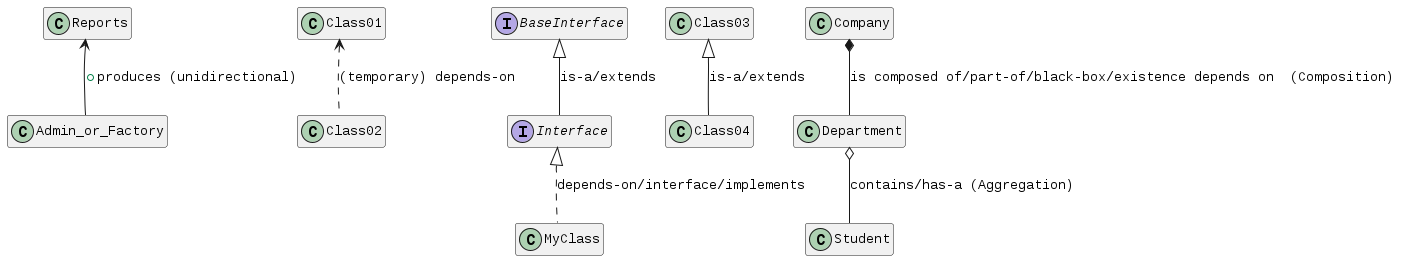

In [1]:
# !curl -Lo plantuml.jar "https://downloads.sourceforge.net/project/plantuml/plantuml.jar?r=https%3A%2F%2Fsourceforge.net%2Fprojects%2Fplantuml%2Ffiles%2Fplantuml.jar%2Fdownload&ts=1563448083"

SILENT_LOG = "2>/dev/null" #comment to show logs
!curl -Lo plantuml.jar "https://github.com/plantuml/plantuml/releases/download/v1.2023.11/plantuml-1.2023.11.jar" $SILENT_LOG

!curl -Lo jlatexmath.zip http://beta.plantuml.net/plantuml-jlatexmath.zip $SILENT_LOG
!unzip -oq jlatexmath.zip
!JLATEX="$(ls jlatexmath*.jar)"
!echo "$JLATEX"

def processPUML(puml, output_files='diagram'):
  puml = puml.replace('"', "\\\"")
  # puml = puml.replace("\\\n", "\\\n")
  output_filename = f'{output_files}.puml'
  !echo -e "$puml" > "$output_filename"
  # !echo -e "$puml"

  # generate image
  !ls *.puml | xargs -I{} java -cp "$JLATEX" -jar plantuml.jar "{}" #-o OUT_DIR
  !ls *.puml | xargs -I{} java -cp "$JLATEX" -jar plantuml.jar "{}" -tsvg #-o OUT_DIR

  # # display image
  from IPython.display import Image
  img = Image(filename=f'{output_files}.png')
  return img

# See https://plantuml.com/class-diagram
# http://web.nchu.edu.tw/~jlu/classes/ooad/inherit.html
processPUML('''@startuml
hide empty fields
hide empty methods
Reports <-- Admin_or_Factory : +produces (unidirectional)
Class01 <.. Class02 : (temporary) depends-on
interface Interface
interface BaseInterface
BaseInterface <|-- Interface : is-a/extends
Interface <|.. MyClass : depends-on/interface/implements
Class03 <|-- Class04 : is-a/extends
Company *-- Department : is composed of/part-of/black-box/existence depends on  (Composition)
Department o-- Student : contains/has-a (Aggregation)
@enduml''')

# **Creational patterns**

### Abstract Factory

+ [Pladitor](https://plantumleditor.com/blog/patterns_abstractfactory/)




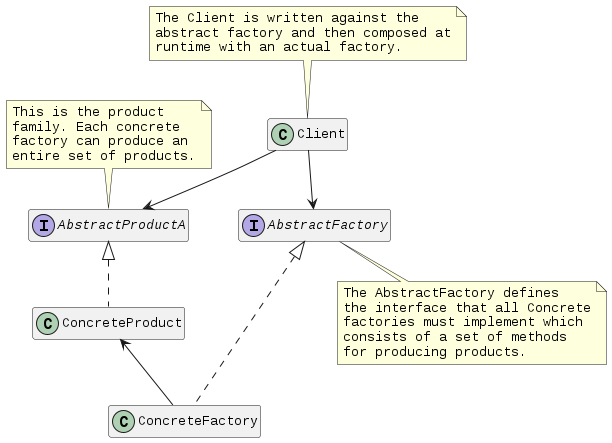

In [ ]:
processPUML('''
@startuml

hide empty fields
hide empty methods
skinparam Nodesep 50
skinparam Ranksep 40

class Client
interface AbstractFactory
interface AbstractProductA
class ConcreteProduct
class ConcreteFactory

Client --> AbstractFactory
Client --> AbstractProductA

AbstractFactory <|.. ConcreteFactory
AbstractProductA <|.. ConcreteProduct
ConcreteProduct <-down- ConcreteFactory


/'=============== NOTES ==================='/
note top of Client
The Client is written against the
abstract factory and then composed at
runtime with an actual factory.
end note
note bottom of AbstractFactory
The AbstractFactory defines
the interface that all Concrete
factories must implement which
consists of a set of methods
for producing products.
end note
note top of AbstractProductA
This is the product
family. Each concrete
factory can produce an
entire set of products.
end note
@enduml
''')

### Factory Method

+ [](https://plantumleditor.com/blog/patterns_factory/)

+ Static Factory Method:
```java
public class ClientService {
      private static ClientService clientService = new ClientService();
      private ClientService() {}
      
      public static ClientService createInstance() {
          return clientService;
      }
}
```

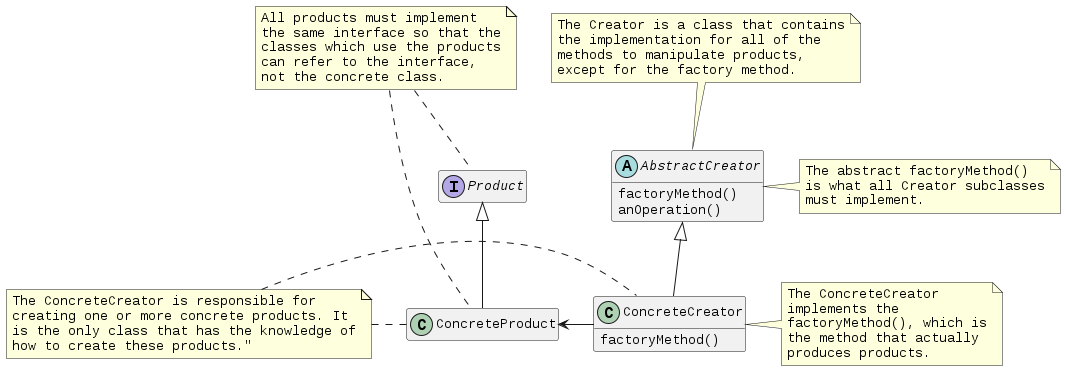

In [ ]:
processPUML('''
@startuml

hide empty fields
hide empty methods

interface Product
abstract AbstractCreator

class ConcreteProduct
class ConcreteCreator

AbstractCreator : factoryMethod()
AbstractCreator : anOperation()
ConcreteCreator : factoryMethod()

AbstractCreator <|-- ConcreteCreator
Product <|-- ConcreteProduct
ConcreteProduct <- ConcreteCreator



/'=============== NOTES ==================='/
note top of AbstractCreator
The Creator is a class that contains
the implementation for all of the
methods to manipulate products,
except for the factory method.
end note
note right of AbstractCreator
The abstract factoryMethod()
is what all Creator subclasses
must implement.
end note
note right of ConcreteCreator
The ConcreteCreator
implements the
factoryMethod(), which is
the method that actually
produces products.
end note
note as n1
The ConcreteCreator is responsible for
creating one or more concrete products. It
is the only class that has the knowledge of
how to create these products."
end note
note as n2
All products must implement
the same interface so that the
classes which use the products
can refer to the interface,
not the concrete class.
end note

n2 .. ConcreteProduct
n2 .. Product
n1 . ConcreteProduct
n1 . ConcreteCreator
@enduml
''')

### Builder

+ [Refactoring.guru](https://refactoring.guru/design-patterns/builder)

![a](https://refactoring.guru/images/patterns/diagrams/builder/structure.png)

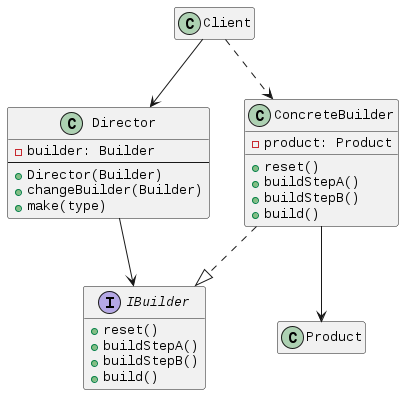

In [5]:
processPUML('''
@startuml

hide empty fields
hide empty methods

class Client
class Director {
   - builder: Builder
   --
   + Director(Builder)
   + changeBuilder(Builder)
   + make(type)
}
interface IBuilder {
   + reset()
   + buildStepA()
   + buildStepB()
   + build()
}
class ConcreteBuilder {
   - product: Product
   + reset()
   + buildStepA()
   + buildStepB()
   + build()
}
class Product


Client --> Director
Director --> IBuilder
ConcreteBuilder ..|> IBuilder
Client ..> ConcreteBuilder
ConcreteBuilder --> Product
@enduml
''')

### Prototype

+ [Refactoring.guru](https://refactoring.guru/design-patterns/prototype)

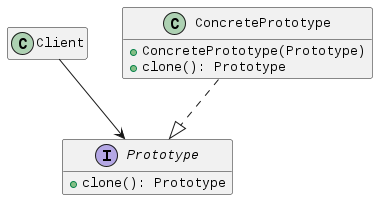

In [7]:
processPUML('''
@startuml

hide empty fields
hide empty methods

class Client
interface Prototype {
   + clone(): Prototype
}
class ConcretePrototype {
   + ConcretePrototype(Prototype)
   + clone(): Prototype
}

Client --> Prototype
ConcretePrototype ..|> Prototype

@enduml
''')

### Singleton

+ [Refactoring.guru](https://refactoring.guru/design-patterns/singleton)


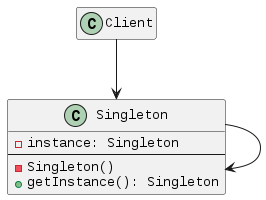

In [8]:
processPUML('''
@startuml
hide empty fields
hide empty methods

class Client
class Singleton {
   - instance: Singleton
   --
   - Singleton()
   + getInstance(): Singleton
}

Client --> Singleton
Singleton --> Singleton

@enduml
''')

# **Structural patterns**

#### Adapter
+ [Pladitor](https://plantumleditor.com/blog/patterns_adapter/)

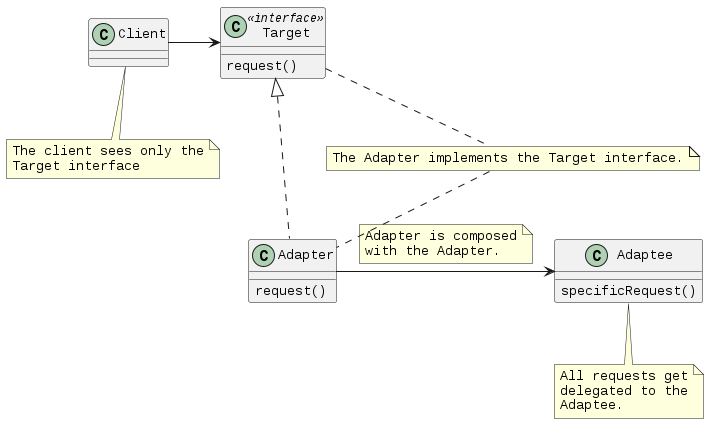

In [ ]:
processPUML('''
@startuml

class Client
class Target <<interface>>
class Adapter
class Adaptee

Target : request()
Adapter : request()
Adaptee : specificRequest()

Client -> Target
Target <|.. Adapter
Adapter -> Adaptee

/'=============== NOTES ==================='/
note on link
Adapter is composed
with the Adapter.
end note
note bottom of Client
The client sees only the
Target interface
end note
note “The Adapter implements the Target interface.” as n1
Target .. n1
n1 .. Adapter
note bottom of Adaptee
All requests get
delegated to the
Adaptee.
end note
@enduml
''')

#### Bridge

+ [Refactoring.guru](https://refactoring.guru/design-patterns/bridge)

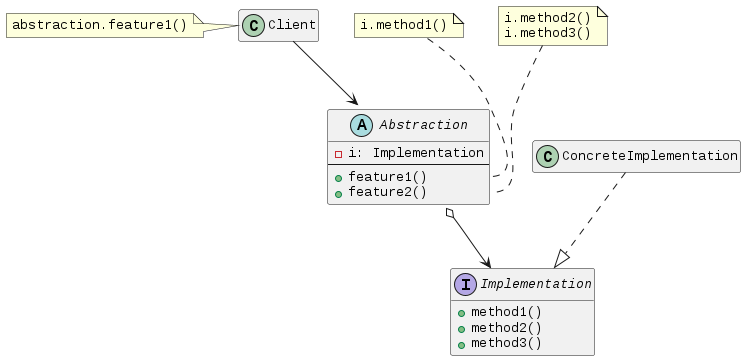

In [31]:
processPUML('''
@startuml
hide empty fields
hide empty methods

class Client
interface Implementation {
  + method1()
  + method2()
  + method3()
}
abstract Abstraction {
  - i: Implementation
  --
  + feature1()
  + feature2()
}

Client --> Abstraction
Abstraction o--> Implementation
ConcreteImplementation ..|> Implementation

/'=============== NOTES ==================='/
note as note_client
abstraction.feature1()
end note
note as note_abstraction_feature1
i.method1()
end note
note as note_abstraction_feature2
i.method2()
i.method3()
end note
note_client . Client
note_abstraction_feature1 .. Abstraction::feature1
note_abstraction_feature2 .. Abstraction::feature2
@enduml
''')

### Composite

+ [Pladitor](https://plantumleditor.com/blog/patterns_composite/)

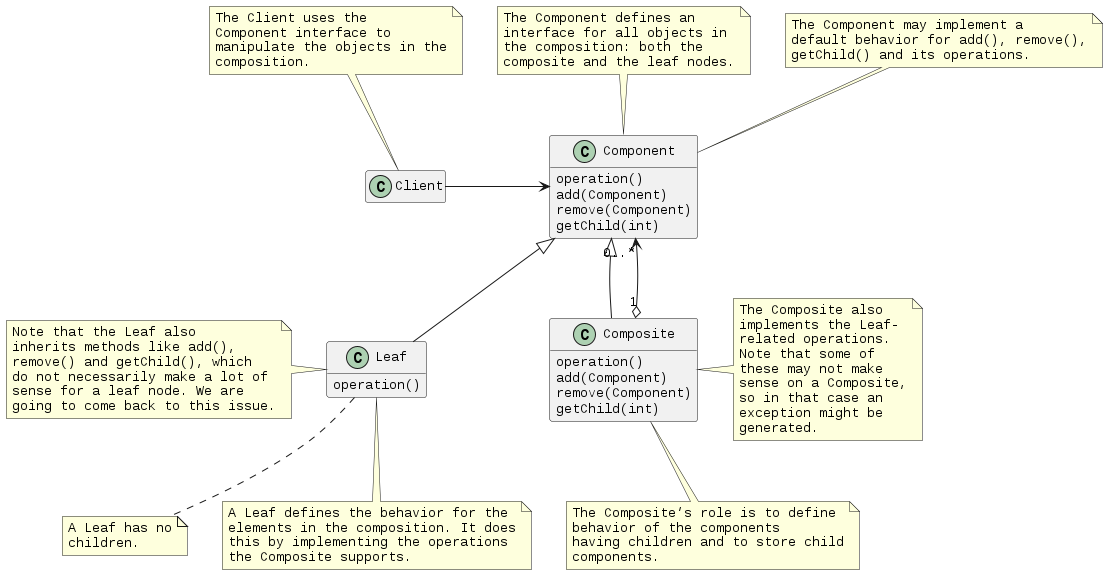

In [ ]:
processPUML('''
@startuml
hide empty fields
hide empty methods

class Client
class Component
class Leaf
class Composite

Component : operation()
Component : add(Component)
Component : remove(Component)
Component : getChild(int)

Leaf : operation()

Composite : operation()
Composite : add(Component)
Composite : remove(Component)
Composite : getChild(int)

Client -> Component
Component <|-- Leaf
Component <|-- Composite
Component "0..*" <--o "1" Composite



/'=============== NOTES ==================='/
note top of Client
The Client uses the
Component interface to
manipulate the objects in the
composition.
end note
note top of Component
The Component defines an
interface for all objects in
the composition: both the
composite and the leaf nodes.
end note
note top of Component
The Component may implement a
default behavior for add(), remove(),
getChild() and its operations.
end note
note bottom of Leaf
A Leaf has no
children.
end note
note left of Leaf
Note that the Leaf also
inherits methods like add(),
remove() and getChild(), which
do not necessarily make a lot of
sense for a leaf node. We are
going to come back to this issue.
end note
note bottom of Leaf
A Leaf defines the behavior for the
elements in the composition. It does
this by implementing the operations
the Composite supports.
end note
note bottom of Composite
The Composite’s role is to define
behavior of the components
having children and to store child
components.
end note
note right of Composite
The Composite also
implements the Leaf-
related operations.
Note that some of
these may not make
sense on a Composite,
so in that case an
exception might be
generated.
end note
@enduml
''')

### Decorator

+ [Pladitor](https://plantumleditor.com/blog/patterns_decorator/)

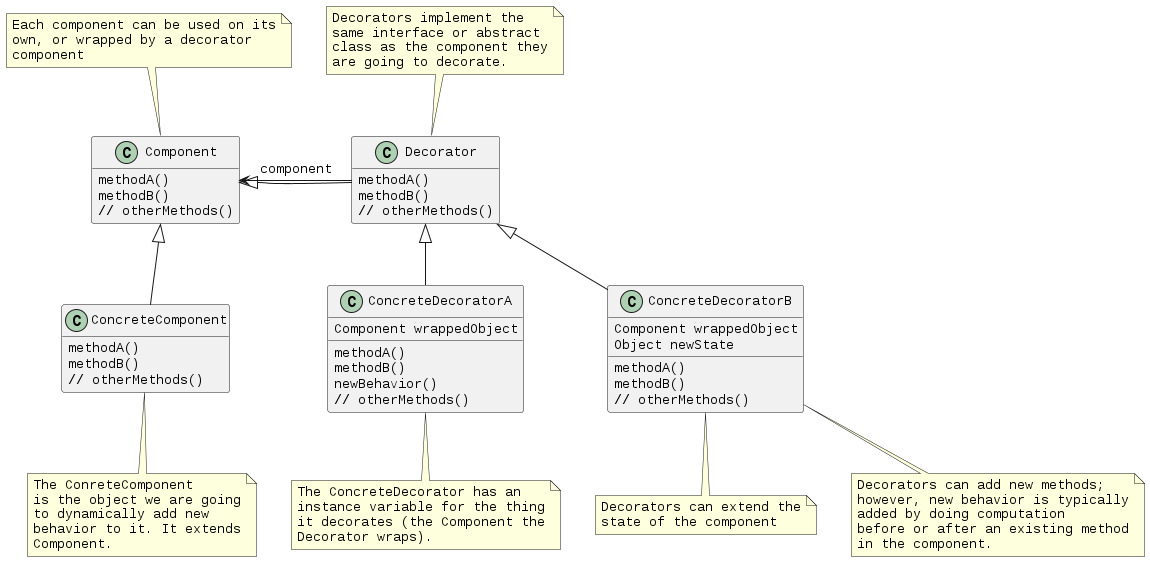

In [ ]:
processPUML('''
@startuml
hide empty fields

class Component
class ConcreteComponent
class Decorator
class ConcreteDecoratorA
class ConcreteDecoratorB

Component : methodA()
Component : methodB()
Component : // otherMethods()

ConcreteComponent : methodA()
ConcreteComponent : methodB()
ConcreteComponent : // otherMethods()

Decorator : methodA()
Decorator : methodB()
Decorator : // otherMethods()

ConcreteDecoratorA : Component wrappedObject
ConcreteDecoratorA : methodA()
ConcreteDecoratorA : methodB()
ConcreteDecoratorA : newBehavior()
ConcreteDecoratorA : // otherMethods()

ConcreteDecoratorB : Component wrappedObject
ConcreteDecoratorB : Object newState
ConcreteDecoratorB : methodA()
ConcreteDecoratorB : methodB()
ConcreteDecoratorB : // otherMethods()

Component <|-- ConcreteComponent
Component <|- Decorator
Decorator <|-- ConcreteDecoratorA
Decorator <|-- ConcreteDecoratorB
Component <- Decorator : component


/'=============== NOTES ==================='/
note top of Component
Each component can be used on its
own, or wrapped by a decorator
component
end note
note bottom of ConcreteComponent
The ConreteComponent
is the object we are going
to dynamically add new
behavior to it. It extends
Component.
end note
note top of Decorator
Decorators implement the
same interface or abstract
class as the component they
are going to decorate.
end note
note bottom of ConcreteDecoratorB
Decorators can extend the
state of the component
end note
note bottom of ConcreteDecoratorB
Decorators can add new methods;
however, new behavior is typically
added by doing computation
before or after an existing method
in the component.
end note
note bottom of ConcreteDecoratorA
The ConcreteDecorator has an
instance variable for the thing
it decorates (the Component the
Decorator wraps).
end note
@enduml
''')

### Facade

+ [Pladitor](https://plantumleditor.com/blog/patterns_facade/)

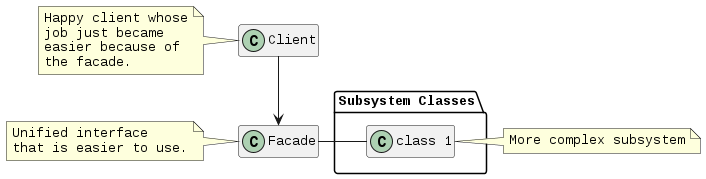

In [ ]:
processPUML('''
@startuml

skinparam Ranksep 20
hide empty fields
hide empty methods

class Client
class Facade
Client --> Facade

package "Subsystem Classes" {
    Facade - "class 1"
}

/'=============== NOTES ==================='/
note left of "class 1"
More complex subsystem
end note
note left of Client
Happy client whose
job just became
easier because of
the facade.
end note
note left of Facade
Unified interface
that is easier to use.
end note
@enduml
''')

### Flyweight

+ [Refactoring.guru](https://refactoring.guru/design-patterns/flyweight)


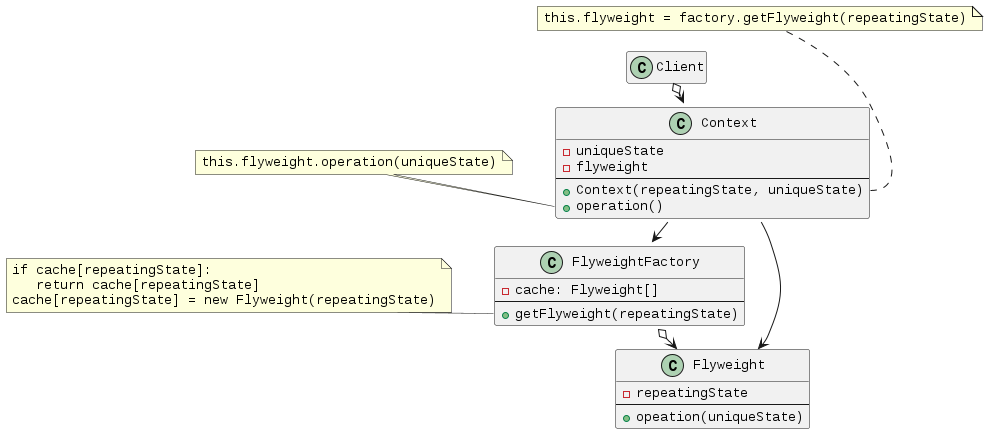

In [22]:
processPUML('''
@startuml
skinparam Ranksep 20
hide empty fields
hide empty methods

class Client
class Context {
  - uniqueState
  - flyweight
  --
  + Context(repeatingState, uniqueState)
  + operation()
}
class FlyweightFactory {
  - cache: Flyweight[]
  --
  + getFlyweight(repeatingState)
}
class Flyweight {
  - repeatingState
  --
  + opeation(uniqueState)
}

Client o--> Context
Context --> Flyweight
Context --> FlyweightFactory
FlyweightFactory o--> Flyweight

/'=============== NOTES ==================='/
note as note_context
this.flyweight = factory.getFlyweight(repeatingState)
end note
note as note_context_operation
this.flyweight.operation(uniqueState)
end note
note as note_flyweight_factory
if cache[repeatingState]:
   return cache[repeatingState]
cache[repeatingState] = new Flyweight(repeatingState)
end note

note_context ... Context::Context
note_context_operation . Context::operation
note_flyweight_factory . FlyweightFactory::getFlyweight
@enduml
''')

# Behavioral patterns

### Chain of Responsibility

+ [Refactoring.guru](https://refactoring.guru/design-patterns/chain-of-responsibility)

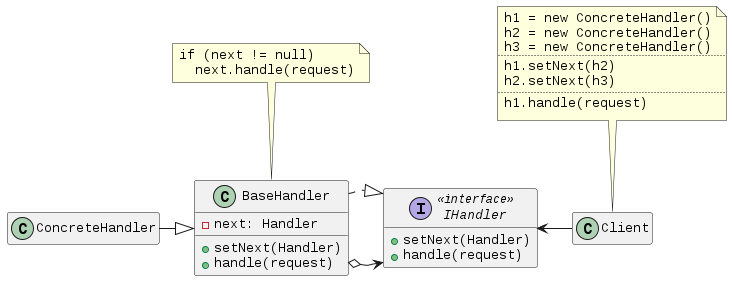

In [ ]:
processPUML('''
@startuml
hide empty fields
hide empty methods


interface IHandler <<interface>> {
    + setNext(Handler)
    + handle(request)
}

class BaseHandler {
    - next: Handler
    + setNext(Handler)
    + handle(request)
}

IHandler <- Client
BaseHandler o-> IHandler
BaseHandler ..|> IHandler
ConcreteHandler -|> BaseHandler


/'=============== NOTES ==================='/
note as note_client
h1 = new ConcreteHandler()
h2 = new ConcreteHandler()
h3 = new ConcreteHandler()
..
h1.setNext(h2)
h2.setNext(h3)
..
h1.handle(request)
end note
note_client .. Client
note as note_handler
if (next != null)
  next.handle(request)
end note
note_handler .. BaseHandler
@enduml
''')

### Command

+ [Pladitor](https://plantumleditor.com/blog/patterns_command/)

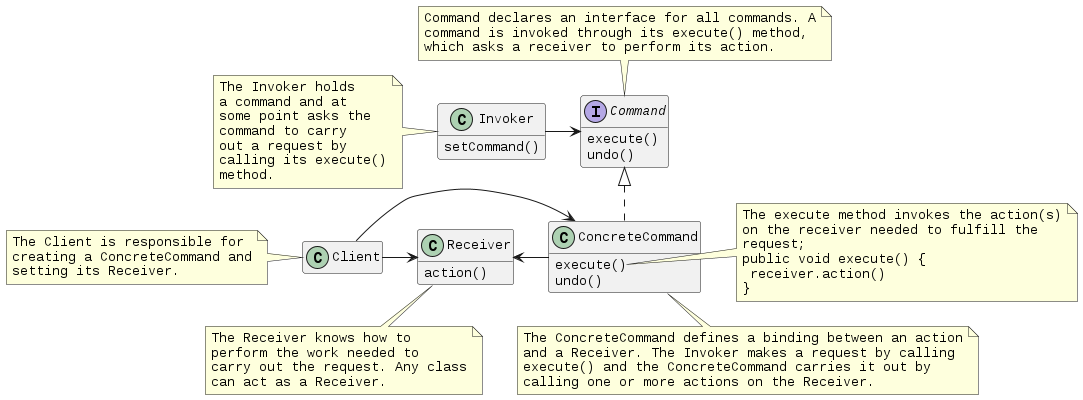

In [ ]:
processPUML('''
@startuml

skinparam Ranksep 15
hide empty fields
hide empty methods

class Client
class Invoker
interface Command
class Receiver
class ConcreteCommand

Invoker : setCommand()
Command : execute()
Command : undo()
Receiver : action()
ConcreteCommand : execute()
ConcreteCommand : undo()

Client -> Receiver
Client -> ConcreteCommand
Receiver <- ConcreteCommand
Invoker -> Command
Command <|.. ConcreteCommand



/'=============== NOTES ==================='/
note left of Client
The Client is responsible for
creating a ConcreteCommand and
setting its Receiver.
end note
note bottom of Receiver
The Receiver knows how to
perform the work needed to
carry out the request. Any class
can act as a Receiver.
end note
note bottom of ConcreteCommand
The ConcreteCommand defines a binding between an action
and a Receiver. The Invoker makes a request by calling
execute() and the ConcreteCommand carries it out by
calling one or more actions on the Receiver.
end note
note left of Invoker
The Invoker holds
a command and at
some point asks the
command to carry
out a request by
calling its execute()
method.
end note
note top of Command
Command declares an interface for all commands. A
command is invoked through its execute() method,
which asks a receiver to perform its action.
end note
note right of ConcreteCommand::execute()
The execute method invokes the action(s)
on the receiver needed to fulfill the
request;
""public void execute() {""
"" receiver.action()""
""}""
end note
@enduml
''')

### Iterator
+ []()

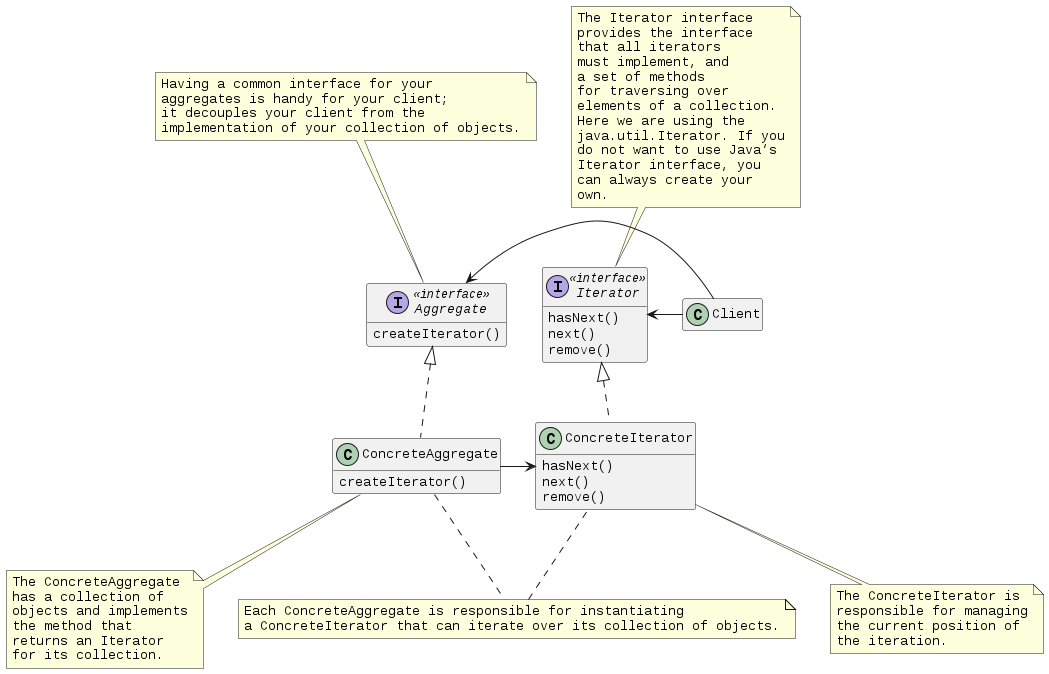

In [ ]:
processPUML('''
@startuml

hide empty fields
hide empty methods

class Client

together {
    interface Aggregate <<interface>>
    interface Iterator <<interface>>
}

together {
    class ConcreteAggregate
    class ConcreteIterator
}

Aggregate : createIterator()
ConcreteAggregate : createIterator()
Iterator : hasNext()
Iterator : next()
Iterator : remove()
ConcreteIterator : hasNext()
ConcreteIterator : next()
ConcreteIterator : remove()

Aggregate <- Client
Client -> Iterator
ConcreteAggregate -> ConcreteIterator
Iterator <|.. ConcreteIterator
Aggregate <|.. ConcreteAggregate



/'=============== NOTES ==================='/
note as note_aggregate
Having a common interface for your
aggregates is handy for your client;
it decouples your client from the
implementation of your collection of objects.
end note
note bottom of ConcreteAggregate
The ConcreteAggregate
has a collection of
objects and implements
the method that
returns an Iterator
for its collection.
end note
note_aggregate .. Aggregate
note as n1
Each ConcreteAggregate is responsible for instantiating
a ConcreteIterator that can iterate over its collection of objects.
end note
ConcreteAggregate .. n1
n1 .. ConcreteIterator
note bottom of ConcreteIterator
The ConcreteIterator is
responsible for managing
the current position of
the iteration.
end note
note as note_iterator
The Iterator interface
provides the interface
that all iterators
must implement, and
a set of methods
for traversing over
elements of a collection.
Here we are using the
java.util.Iterator. If you
do not want to use Java’s
Iterator interface, you
can always create your
own.
end note
note_iterator .. Iterator
@enduml
''')

### Mediator

+ [Mediator](https://refactoring.guru/design-patterns/mediator)

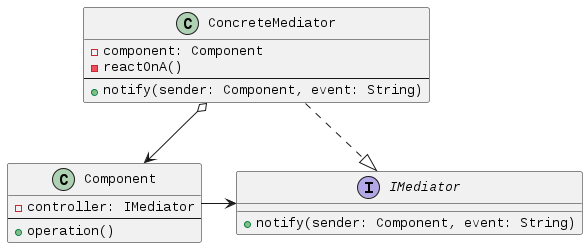

In [ ]:
processPUML('''
@startuml

interface IMediator {
    + notify(sender: Component, event: String)
}
class ConcreteMediator {
    - component: Component
    - reactOnA()
    --
    + notify(sender: Component, event: String)
}

class Component {
  - controller: IMediator
  --
  + operation()
}

ConcreteMediator ..|> IMediator
ConcreteMediator o-> Component
Component -> IMediator


/'=============== NOTES ==================='/
@enduml
''')

### Observer

+ [](https://plantumleditor.com/blog/patterns_observer/)

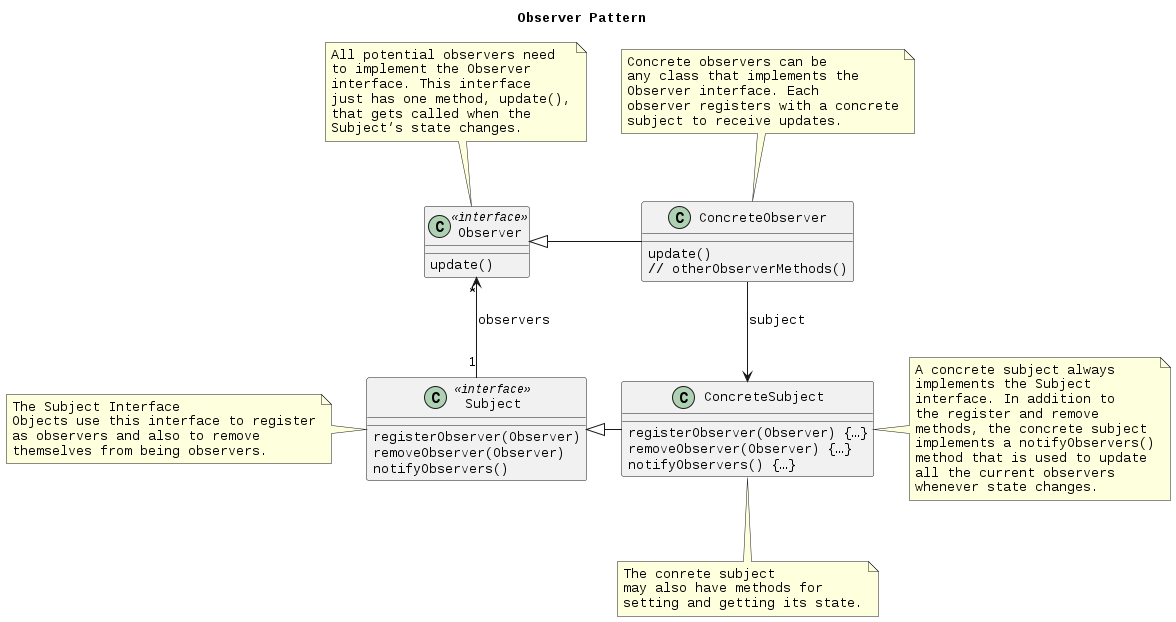

In [ ]:
processPUML('''
@startuml

title Observer Pattern

class Subject <<interface>>
class Observer <<interface>>
class ConcreteSubject
class ConcreteObserver

Subject : registerObserver(Observer)
Subject : removeObserver(Observer)
Subject : notifyObservers()

Observer : update()
ConcreteObserver : update()
ConcreteObserver : // otherObserverMethods()

ConcreteSubject : registerObserver(Observer) {…}
ConcreteSubject : removeObserver(Observer) {…}
ConcreteSubject : notifyObservers() {…}

Subject “1” -up-> “*” Observer : “observers”

ConcreteSubject <-left- ConcreteObserver : "subject"
Subject <|- ConcreteSubject
Observer <|- ConcreteObserver




/'=============== NOTES ==================='/
note left of Subject
The Subject Interface
Objects use this interface to register
as observers and also to remove
themselves from being observers.
end note
note right of ConcreteSubject
A concrete subject always
implements the Subject
interface. In addition to
the register and remove
methods, the concrete subject
implements a notifyObservers()
method that is used to update
all the current observers
whenever state changes.
end note
note bottom of ConcreteSubject
The conrete subject
may also have methods for
setting and getting its state.
end note
note top of ConcreteObserver
Concrete observers can be
any class that implements the
Observer interface. Each
observer registers with a concrete
subject to receive updates.
end note
note top of Observer
All potential observers need
to implement the Observer
interface. This interface
just has one method, update(),
that gets called when the
Subject’s state changes.
end note
@enduml
''')

### State

+ [Pladitor](https://plantumleditor.com/blog/patterns_state/)

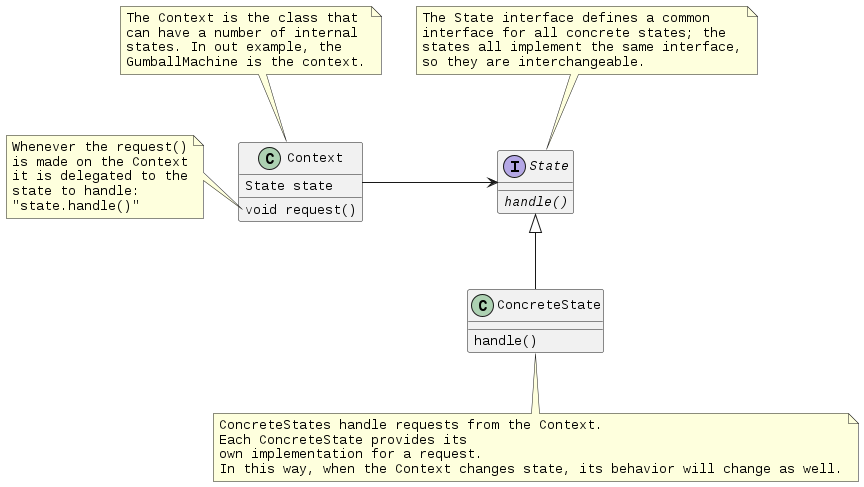

In [ ]:
processPUML('''
@startuml

class Context {
  void request()
  State state
}

interface State {
  {abstract} handle()
}

together {
  class ConcreteState
}

ConcreteState : handle()

Context -> State
State <|-- ConcreteState

/'=============== NOTES ==================='/
note top of Context
The Context is the class that
can have a number of internal
states. In out example, the
GumballMachine is the context.
end note
note left of Context::request
Whenever the request()
is made on the Context
it is delegated to the
state to handle:
"state.handle()"
end note
note top of State
The State interface defines a common
interface for all concrete states; the
states all implement the same interface,
so they are interchangeable.
end note
note bottom of ConcreteState
ConcreteStates handle requests from the Context.
Each ConcreteState provides its
own implementation for a request.
In this way, when the Context changes state, its behavior will change as well.
end note
@enduml
''')

### Template

+ [](https://plantumleditor.com/blog/patterns_template/)

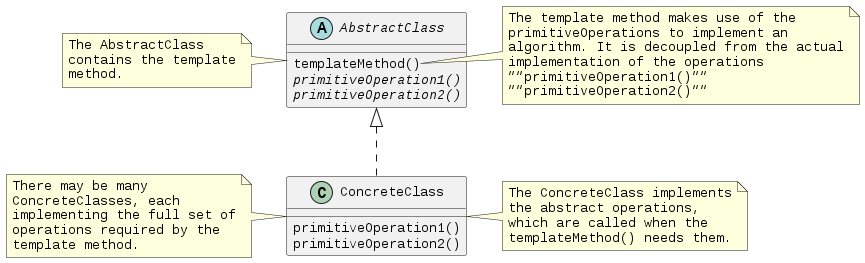

In [ ]:
processPUML('''
@startuml

abstract AbstractClass {

    templateMethod()
    {abstract} primitiveOperation1()
    {abstract} primitiveOperation2()
}

class ConcreteClass

ConcreteClass : primitiveOperation1()
ConcreteClass : primitiveOperation2()

AbstractClass <|.. ConcreteClass


/'=============== NOTES ==================='/
note left of AbstractClass
The AbstractClass
contains the template
method.
end note
note left of ConcreteClass
There may be many
ConcreteClasses, each
implementing the full set of
operations required by the
template method.
end note
note right of ConcreteClass
The ConcreteClass implements
the abstract operations,
which are called when the
templateMethod() needs them.
end note
note right of AbstractClass::templateMethod
The template method makes use of the
primitiveOperations to implement an
algorithm. It is decoupled from the actual
implementation of the operations
“”primitiveOperation1()””
“”primitiveOperation2()””
end note
@enduml
''')